In [2]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import explained_variance_score
import xgboost
%matplotlib inline

## Extracting the data

In [176]:
#Lecture des données
train_data = pd.read_csv('dataset/train.csv', sep=',',low_memory=False)
store_data = pd.read_csv('dataset/store.csv', sep=',',low_memory=False)
test_data = pd.read_csv('dataset/test.csv', sep=',',low_memory=False)
train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


## Creating the dataset
As we so in the virtualization notebook the sales depends on variables that are in different tables. Therefore we need to bring them togheter in one joined train dataset in order to choose the right variable for a good estimation.

Furthemore we showed that some qualitative variables such as the store type have an important influences on the sales so we need a way to make them usable(available) so we transoformed the inital colomn into 4 different Hot-vectors 

In [177]:
# Cleaning the dataset
store_data['CompetitionOpenSinceMonth'].fillna(store_data['CompetitionOpenSinceMonth'].median(),inplace=True)
store_data['CompetitionOpenSinceYear'].fillna(store_data['CompetitionOpenSinceYear'].median(),inplace=True)
train_data[(train_data["Sales"]!=0) & (train_data["Open"]!=0)]
store_data.fillna(0, inplace = True)

# Merging the two tables in order to deal with every variables that influences the sales
join_train = train_data.join(store_data.set_index('Store'),on='Store')
le = preprocessing.LabelEncoder()
newdata = le.fit_transform(join_train['Date'])
join_train['Date']=newdata
join_train.fillna(0, inplace = True)
#One Hot vector
join_train = pd.get_dummies(join_train)
join_test = test_data.join(store_data.set_index('Store'),on='Store')
le = preprocessing.LabelEncoder()
newdata = le.fit_transform(join_test['Date'])
join_test['Date']=newdata
#One hot-vector
join_test = pd.get_dummies(join_test)
join_test

,Id,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,1,4,47,1.0,1,0,1270.0,9.0,2008.0,...,0,1,0,1,0,0,1,0,0,0
1,2,3,4,47,1.0,1,0,14130.0,12.0,2006.0,...,0,0,0,1,0,0,0,0,1,0
2,3,7,4,47,1.0,1,0,24000.0,4.0,2013.0,...,0,0,0,0,0,1,1,0,0,0
3,4,8,4,47,1.0,1,0,7520.0,10.0,2014.0,...,0,0,0,1,0,0,1,0,0,0
4,5,9,4,47,1.0,1,0,2030.0,8.0,2000.0,...,0,0,0,0,0,1,1,0,0,0
5,6,10,4,47,1.0,1,0,3160.0,9.0,2009.0,...,0,0,0,1,0,0,1,0,0,0
6,7,11,4,47,1.0,1,0,960.0,11.0,2011.0,...,0,0,0,0,0,1,0,0,1,0
7,8,12,4,47,1.0,1,0,1070.0,8.0,2010.0,...,0,0,0,0,0,1,0,0,1,0
8,9,13,4,47,1.0,1,0,310.0,8.0,2010.0,...,0,0,1,1,0,0,0,1,0,0
9,10,14,4,47,1.0,1,0,1300.0,3.0,2014.0,...,0,0,0,1,0,0,0,0,1,0


# Train & Test

- Defining the variables chosen in order to estimate
- Buil the train and test dataset by splitting the joined table

In [188]:

#Choosing the predictors and the predicted 
predicteurs=['Date','DayOfWeek','Open','Promo','Promo2','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']
predictants=['Sales']

#Splitting to get the train and the test
y = join_train[(predictants)].values
X = join_train[(predicteurs)].values
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.1)
join_train.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,941,5263,555,1,1,1,1270.0,9.0,...,0,1,0,1,0,0,1,0,0,0
1,2,5,941,6064,625,1,1,1,570.0,11.0,...,0,0,0,1,0,0,0,0,1,0
2,3,5,941,8314,821,1,1,1,14130.0,12.0,...,0,0,0,1,0,0,0,0,1,0
3,4,5,941,13995,1498,1,1,1,620.0,9.0,...,0,1,0,0,0,1,1,0,0,0
4,5,5,941,4822,559,1,1,1,29910.0,4.0,...,0,0,0,1,0,0,1,0,0,0


# Models 
Here we used different models we compared their scores and chosen the best one

### Linear Regression 


In [189]:
#Linear regression
reg_lin = linear_model.LinearRegression()
reg_res = reg_lin.fit(X_train,y_train)

reg_lin_scorev=reg_lin.score(X_valid,y_valid)
reg_lin_scoret=reg_lin.score(X_train,y_train)
print("Score de Validation = ",reg_lin_scorev," Score d'entrainement = ",reg_lin_scoret)

Score de Validation =  0.5438458845804921  Score d'entrainement =  0.5426810974813969


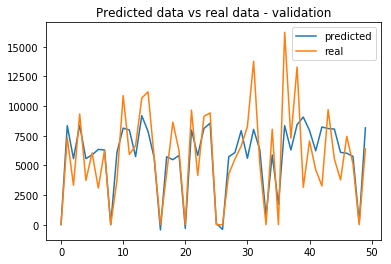

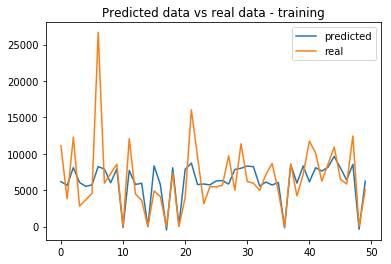

In [25]:
toprint = 50
y_predictv = reg_lin.predict(X_valid)
plt.plot(y_predictv[0:toprint],label="predicted")
plt.plot(y_valid[0:toprint],label="real")
plt.legend()
plt.title("Predicted data vs real data - validation")
plt.show()

y_predictt=reg_lin.predict(X_train)
plt.plot(y_predictt[0:toprint],label="predicted")
plt.plot(y_train[0:toprint],label="real")
plt.legend()
plt.title("Predicted data vs real data - training")
plt.show()

### Random Forest

In [165]:
#Random Forest
regrf = RandomForestRegressor(max_depth=15,n_estimators=20)
regrf.fit(X_train,np.ravel(y_train))

regrf_scorev=regrf.score(X_valid,y_valid)
regrf_scoret=regrf.score(X_train,y_train)
print("Score de Validation = ",regrf_scorev," Score d'entrainement = ",regrf_scoret)

Score de Validation =  0.6343341331875356  Score d'entrainement =  0.6422137837672495


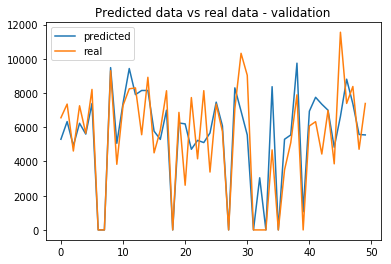

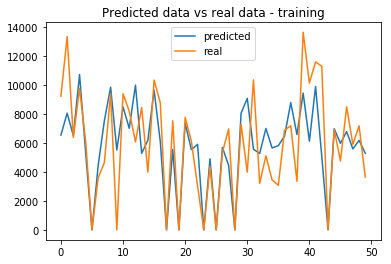

In [17]:
y_predictv = regrf.predict(X_valid)
plt.plot(y_predictv[0:toprint],label="predicted")
plt.plot(y_valid[0:toprint],label="real")
plt.legend()
plt.title("Predicted data vs real data - validation")
plt.show()

y_predictt=regrf.predict(X_train)
plt.plot(y_predictt[0:toprint],label="predicted")
plt.plot(y_train[0:toprint],label="real")
plt.legend()
plt.title("Predicted data vs real data - training")
plt.show()


### MultiLayer Perceptron

In [166]:
# MultiLayer Perceptron
nn=MLPRegressor(hidden_layer_sizes=(20,), activation='relu',solver='adam')
nn.fit(X_train,np.ravel(y_train))

nn_scorev=nn.score(X_valid,y_valid)
nn_scoret=nn.score(X_train,y_train)
print("Score de Validation = ",nn_scorev," Score d'entrainement = ",nn_scoret)

c:\users\mamoun\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Score de Validation =  0.5778895561608733  Score d'entrainement =  0.5766328312345681


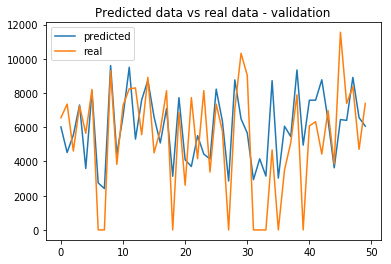

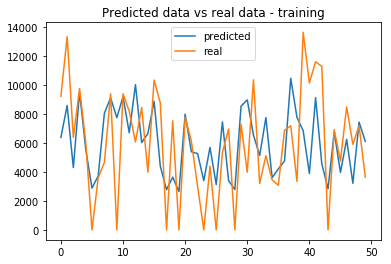

In [19]:
y_predictv = nn.predict(X_valid)
plt.plot(y_predictv[0:toprint],label="predicted")
plt.plot(y_valid[0:toprint],label="real")
plt.legend()
plt.title("Predicted data vs real data - validation")
plt.show()

y_predictt=nn.predict(X_train)
plt.plot(y_predictt[0:toprint],label="predicted")
plt.plot(y_train[0:toprint],label="real")
plt.legend()
plt.title("Predicted data vs real data - training")
plt.show()


### Gradient Boosting

In [182]:
#XgBoost
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.3, max_depth=15)
xgb.fit(X_train,y_train)

xgb_scorev=xgb.score(X_valid,y_valid)
xgb_scoret=xgb.score(X_train,y_train)
print("Score de Validation = ",xgb_scorev," Score d'entrainement = ",xgb_scoret)

Score de Validation =  0.9368287236190119  Score d'entrainement =  0.9727976439000727


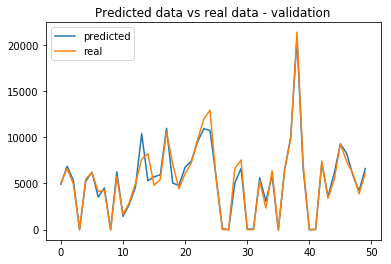

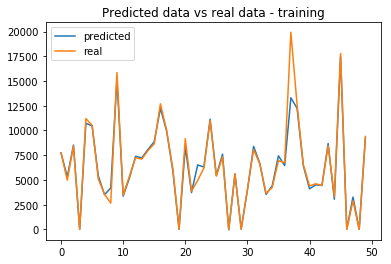

In [183]:
y_predictv = xgb.predict(X_valid)
plt.plot(y_predictv[0:toprint],label="predicted")
plt.plot(y_valid[0:toprint],label="real")
plt.legend()
plt.title("Predicted data vs real data - validation")
plt.show()

y_predictt=xgb.predict(X_train)
plt.plot(y_predictt[0:toprint],label="predicted")
plt.plot(y_train[0:toprint],label="real")
plt.legend()
plt.title("Predicted data vs real data - training")
plt.show()

## Predicting on the test dataset

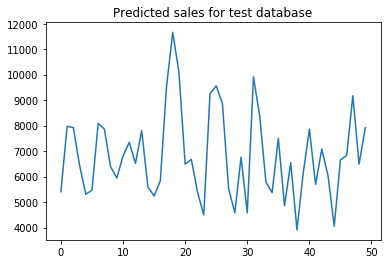

In [184]:
#Prédictions des données de tests avec le meilleur model
ytest_predicted = xgb.predict(join_test[(predicteurs)].values)

plt.plot(ytest_predicted[0:toprint])
plt.title("Predicted sales for test database")
plt.show()

In [38]:
ytest_predicted

array([ 5333.027 ,  7373.7144,  8835.78  , ...,  5071.784 , 16038.909 ,
        5342.862 ], dtype=float32)

In [185]:
submit=pd.DataFrame(ytest_predicted,columns=["Sales"],index=join_test['Id'])

In [41]:
submit.head()

,Sales
Id,
1,5333.026855
2,7373.714355
3,8835.780273
4,6603.230469
5,6740.857910


In [186]:
submit['Id']=submit.index

In [69]:
submit

,Sales,Id
Id,,
1,5333.026855,1
2,7373.714355,2
3,8835.780273,3
4,6603.230469,4
5,6740.857910,5
6,5979.050781,6
7,7502.543457,7
8,8379.767578,8
9,6511.426758,9


In [187]:
submit.to_csv('submissionfinal1.csv',index=False,header=True)